In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def extract_segments(img, pad=10) :
    '''function to extract individual chacters and digits from an image
    input paramterts
    img : input image (numpy array)
    pad : padding window size around segments (int)
    Returns
    out : list of each segments '''
    
    import cv2
    # thresholding the image
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    
    # Negative tranform gray levels (background becomes black) 
    thresh1 = thresh1 - 1
    thresh1[thresh1 == 254] = 0
    thresh1[thresh1 == - 1 ] = 255
    
    # connected component labelling 
    output = cv2.connectedComponentsWithStats(thresh1, 4)
    final = []
    for i in range(1,output[0]):
        cord = output[2][i]
        num = np.pad( thresh1[ cord[1]:cord[1]+cord[3], cord[0]:cord[0]+cord[2] ], pad,'constant')
        final.append(num)
    
    return final

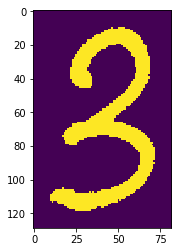

In [3]:
# reading the image
img = cv2.imread('/Users/josejoy/Desktop/ECE 271B Stat Learning /project/eq1.jpg',0)
segments= extract_segments(img, 10)
plt.imshow(segments[1])
plt.show()